# xlwings 練習  

xlwings は openpyxl とともに Excel ファイルを操作するための代表的な Python パッケージです。両者とも Anaconda に同梱されています。  
簡単に比較すると、  

|[xlwings](https://www.xlwings.org/)|[openpyxl](https://openpyxl.readthedocs.io/)| 
|-----------------------------------|--------------------------------------------|
|Excel アプリを通して Excel ファイルを取り扱う|Excel ファイルを直接操作する|
|Excel アプリのインストールが必要|Excel アプリ不要で利用できる|                             
|処理が遅い|速い|
|Excel のバグも考慮しなければならない|Excel のバグの影響をうけない|
|制限は Excel に準じる|ブックを超えたシートのコピーなどが出来ない|
|VBA に近い|VBA とはかなり異なる|

このような違いがあります。  

コードの実行とともに Excel が動くので、xlwings のほうがコーディングやデバッグはしやすいと感じます。  

[xlwings - 翔べ！Excel — xlwings dev ドキュメント](https://docs.xlwings.org/ja/latest/)  
[Python API — xlwings dev documentation](https://docs.xlwings.org/en/stable/api.html)  

In [1]:
# xlwings のインポート
import xlwings as xw

In [2]:
# 新規 Book クラスを作成 (Excel が起動します)
book_xw = xw.Book()
print(type(book_xw))

<class 'xlwings.main.Book'>


In [3]:
# 作成したファイルを名前を付けて保存
book_xw.save("book_xw.xlsx")

In [4]:
# 最後に Excel 自体を終了させる必要があるため 
# Excel アプリ (App クラス) を取得しておく
app_xw = book_xw.app
print("App's pid: {}".format(app_xw.pid))
print(type(app_xw))

App's pid: 244
<class 'xlwings.main.App'>


In [5]:
# Sheets クラスを取得
# VBA の Worksheets コレクションに相当
sheets_xw = book_xw.sheets
print(type(sheets_xw))

<class 'xlwings.main.Sheets'>


In [6]:
# Sheets へのインデックス指定で Sheet クラスを取得
# [] でのインデックス指定は 0 から始まる (Python 風)
# () でのインデックス指定は 1 から始まる (VBA 風)
print(type(sheets_xw[0]))
print(sheets_xw[0].name)
print(sheets_xw(1).name)
# 名前を指定しての取得も可能
print(sheets_xw["Sheet1"].name)

<class 'xlwings.main.Sheet'>
Sheet1
Sheet1
Sheet1


In [7]:
# 新しいシートを追加
# 追加されたシートが自動的にアクティブになる
sheets_xw.add("シート2", after="Sheet1")  # befor="sheet_name" も可/before と after は前者が優先
print("現在のシート数は {} です。".format(sheets_xw.count))
print("現在アクティブなシートは {} です。".format(sheets_xw.active.name))

現在のシート数は 2 です。
現在アクティブなシートは シート2 です。


In [8]:
print(sheets_xw[1].name)          # Python 風
print(sheets_xw(2).name)          # VBA 風
print(sheets_xw["シート2"].name)

シート2
シート2
シート2


In [9]:
# Sheet1 をアクティブにする
sheets_xw("Sheet1").activate()
print("現在アクティブなシートは {} です。".format(sheets_xw.active.name))

現在アクティブなシートは Sheet1 です。


In [10]:
# Sheet1 → シート1 にリネーム
s1_xw = sheets_xw("Sheet1")
s1_xw.name = "シート1"
print("現在アクティブなシートは {} です。".format(sheets_xw.active.name))

現在アクティブなシートは シート1 です。


In [11]:
# Range クラスを取得してアクセス
s1_xw[0, 0].value = "A1"          # Python 風
s1_xw.range("B1").value = "B1"    # VBA 風
s1_xw.range((1, 3)).value = "C1"  # VBA 風

In [12]:
# 複数のセル範囲に対する処理
# セルの背景色 RGB をタプルで渡して指定
s1_xw.range("A2:C2").color = (255, 0, 0)  

In [13]:
# Sheet.range((from), (to)) で VBA 風のインデックスを渡してセル範囲を取得
rng_A3_J4 = s1_xw.range((3, 1), (4, 10))  

In [14]:
listed_values = [["A3", "B3", "C3", "D3", "E3", "F3", "G3", "H3", "I3", "J3"], ["A4", "B4", "C4", "D4", "E4", "F4", "G4", "H4", "I4", "J4"]]  # list
rng_A3_J4.value = listed_values

In [15]:
# 単一のセルの value に対して複数要素を持つリスト (やタプル) を与えた場合
s1_xw.range("A5").value = listed_values

In [16]:
s1_xw.range("A7").value = [[cell for cell in row] for row in ["ABCDEFGHIJ", "1234567890"]]  # リスト内法表記を利用

In [17]:
s1_xw.range("A9:J10").formula = "=ROW(A9) & \", \" & COLUMN(A9)"  # 文字列中のダブルクォーテーションは \ でエスケープ

In [18]:
# セルの背景色をクラスで定義された定数で指定
rng_A3_J4.color = xw.constants.RgbColor.rgbBlue 

In [19]:
# api を使って Excel ネイティブのオブジェクトを操作
# ここではフォントの色を変更
rng_A3_J4.api.Font.Color = xw.constants.RgbColor.rgbRed

xlwings で利用できるその他の定数の一覧は以下を参照ください。  
[xlwings/constants.py at master · xlwings/xlwings](https://github.com/xlwings/xlwings/blob/master/xlwings/constants.py)  

In [20]:
# 行範囲および列範囲の操作
# セルの背景色をなくす
s1_xw.range("3:3").color = None

In [21]:
s1_xw.range("B:B").color = None

In [22]:
# Sheet.cells() は Range を返す
s1_xw.cells(11, 1).value = "A11"
print(type(s1_xw.cells(11, 1)))

<class 'xlwings.main.Range'>


In [23]:
# 式の入力
s1_xw.cells(11, 2).formula = "=\"B\" & row(A11)"

In [24]:
# copy を使ってセルのコピー
# 元の式中の相対セル参照部分も相対移動する
s1_xw.range((11, 2)).copy(destination=s1_xw.range((11, 3)))

In [25]:
# この方法では相対セル参照であっても元の数式のとおり
s1_xw.range((11, 4)).formula = s1_xw.range((11, 2)).formula

In [26]:
# Sheet.cells でシート内のすべてのセル範囲を選択
# clear() は、Range の値、式、書式をクリアする
s1_xw.cells.clear()

---
## pandas.DataFrame のデータをセルに入力  

In [27]:
import pandas as pd 

df = pd.read_csv("./pandas練習用データ/都道府県コード.csv", encoding="utf-8") 
df

,Code,Name
0,1,北海道
1,2,青森県
2,3,岩手県
3,4,宮城県
4,5,秋田県
5,6,山形県
6,7,福島県
7,8,茨城県
8,9,栃木県
9,10,群馬県


In [28]:
# DataFrame をそのまま貼り付け
s1_xw.range("A1").value = df

In [29]:
# 不要な DataFrame の index 列を削除
s1_xw.range("A:A").delete(shift="left")

---  
## グラフや画像の挿入  

In [30]:
# シート2 を表示 (アクティブに)
s2_xw = sheets_xw("シート2")
s2_xw.activate()
print("現在アクティブなシートは {} です。".format(sheets_xw.active.name))

現在アクティブなシートは シート2 です。


In [31]:
# グラフを描くためのデータを作成
import numpy as np

x = np.linspace(-5, 5, 101)
y_sin = np.sin(x)
y_cos = np.cos(x)

In [32]:
# pandas.DataFrame と同様、numpy.ndarray もそのまま貼り付け
s2_xw.range("A1").value = x
s2_xw.range("A2").value = y_sin
s2_xw.range("A3").value = y_cos

In [33]:
# データの個数を確認
print(len(x))

101


In [34]:
# 使用されている最大の行を取得
s2_xw.used_range.last_cell.row

3

In [35]:
# 使用されている最大の列を取得
# データの個数と一致
s2_xw.used_range.last_cell.column

101

In [36]:
# Sheet.used_range.last_cell で取得されているのは Range
last_cell = s2_xw.used_range.last_cell
print(type(last_cell))

<class 'xlwings.main.Range'>


In [37]:
# Range.get_address() を使うと A1 形式のアドレスが返る
s2_xw.used_range.last_cell.get_address()

'$CW$3'

In [38]:
# データをもとに Chart (グラフ) クラスを作成
chart_xw = s2_xw.charts.add()
print(type(chart_xw))

<class 'xlwings.main.Chart'>


In [39]:
chart_xw.set_source_data(s2_xw.range("A2:{}".format(last_cell.get_address())))
chart_xw.chart_type = 'line'
chart_xw.left = 0  # シート左端からのグラフの位置
chart_xw.top = 100  # シート上端からのグラフの位置

In [40]:
# api を使って Excel ネイティブのオブジェクトを操作
# ここでは x 軸の目盛りを変換
chart_xw.api[1].SeriesCollection(1).XValues = s2_xw.api.Range("A1:CW1")  # ネイティブの Range オブジェクトを渡す。s2_xw.range("A1:CW1") では不可

注意: Chart.api は要素が 2 つのタプルを返します。  
2 番目の要素 (インデックス指定は `[1]`) を指定することでうまく操作できるようです。理由はよくわかりません💦  

[python - set chart name in Xlwings - Stack Overflow](https://stackoverflow.com/questions/44910566/set-chart-name-in-xlwings?rq=1)  

In [41]:
# ここではタイトルを設定
chart_xw.api[1].HasTitle = True
chart_xw.api[1].ChartTitle.Text = "Sin Curve & Cos Curve"

In [42]:
# ここでは凡例ラベルを変更
names = ("y_sin", "y_cos")
for s, n in zip(chart_xw.api[1].SeriesCollection(), names):
    s.XValues = s2_xw.api.Range("A1:CW1")
    s.Name = n

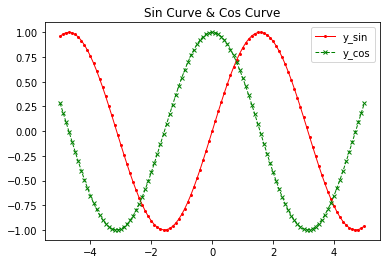

In [43]:
# matplotlib の Figure を画像として挿入
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(x, y_sin, label="y_sin", c="r", lw=1, ls="-", marker=".", markersize=4, alpha=1)
plt.plot(x, y_cos, label="y_cos", c="g", lw=1, ls="--", marker="x", markersize=4, alpha=1)
plt.legend()
plt.title("Sin Curve & Cos Curve")
plt.show()

In [44]:
p1_xw = s2_xw.pictures.add(fig, name="plt_pict", update=True)
p1_xw.left = 450
p1_xw.top = 100

In [45]:
# png の挿入
p2_xw = s2_xw.pictures.add("https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png", name="g_logo_pict", update=True)
p2_xw.left = 0
p2_xw.top = 350

In [46]:
# 上書き保存して終了
book_xw.save()
book_xw.close()
app_xw.quit()  # ← これがないと Excel のプロセスが残ってしまう